# How well do jobs and skills pay for Data Analysts?

### Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for data analysts
3. Visualize for highest paying skills and most demanded skills


In [1]:
 # Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\vikra\Desktop\Data analyst Luke\python\3_project\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [11]:
#filter for the country
df_India = df[(df['job_country']=='India')].dropna(subset=['salary_year_avg'])

In [14]:
job_titles = df_India['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [19]:
df_India_top6 = df_India[df_India['job_title_short'].isin(job_titles)]


In [28]:
job_order = df_India_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

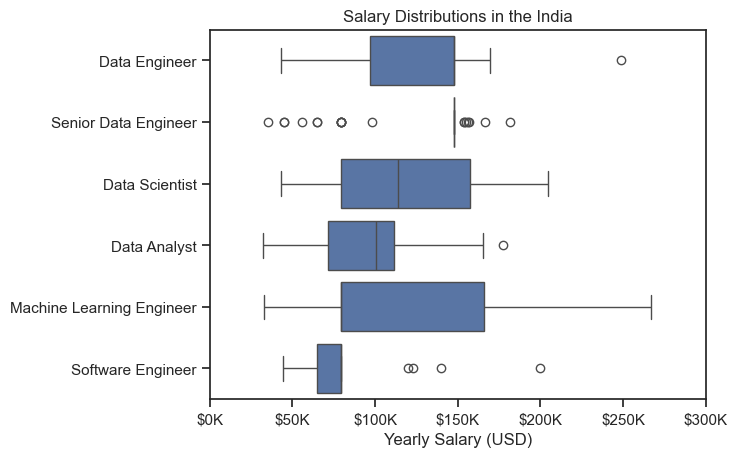

In [29]:
sns.boxplot(data=df_India_top6,x='salary_year_avg',y='job_title_short',order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0,300000)
ticks_x = plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## Investigating median salary vs skill for data analyst

In [32]:
df_DA_India = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='India')].copy()
df_DA_India = df_DA_India.dropna(subset=['salary_year_avg'])

In [34]:
df_DA_India = df_DA_India.explode('job_skills')

In [37]:
df_DA_India[['salary_year_avg','job_skills']].head()

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [55]:
df_DA_top_pay = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10) # getting top 10 paying skills
df_DA_top_pay

,count,median
job_skills,,
pyspark,1,165000.0
linux,1,165000.0
gitlab,1,165000.0
mysql,1,165000.0
postgresql,1,165000.0
mongodb,6,163782.0
gdpr,2,163782.0
neo4j,1,163782.0
databricks,3,163782.0


In [56]:
df_DA_skills = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median',ascending=False) #getting top 10 popular skills and sorting by median
df_DA_skills

,count,median
job_skills,,
spark,11,111175.0
power bi,17,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


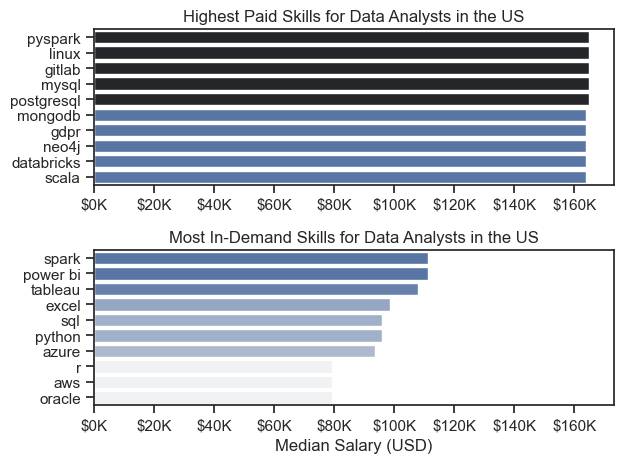

In [57]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()